In [3]:
lirik = """Kita mesti telanjang dan benar-benar bersih\n
Suci lahir dan di dalam batin\n
Tengoklah ke dalam sebelum bicara\n
Singkirkan debu yang masih melekat\n
Singkirkan debu yang masih melekat\n
Anugerah dan bencana adalah kehendak-Nya\n
Kita mesti tabah menjalani\n
Hanya cambuk kecil agar kita sadar\n
Adalah Dia di atas segalanya\n
Adalah Dia di atas segalanya\n
Anak menjerit-jerit, asap panas membakar\n
Lahar dan badai menyapu bersih\n
Ini bukan hukuman, hanya satu isyarat\n
Bahwa kita mesti banyak berbenah\n
Memang, bila kita kaji lebih jauh\n
Dalam kekalutan, masih banyak tangan\n
Yang tega berbuat nista... oh\n
Tuhan pasti telah memperhitungkan\n
Amal dan dosa yang kita perbuat\n
Ke manakah lagi kita kan sembunyi\n
Hanya kepada-Nya kita kembali\n
Tak ada yang bakal bisa menjawab\n
Mari, hanya tunduk sujud pada-Nya\n
Kita mesti berjuang memerangi diri\n
Bercermin dan banyaklah bercermin\n
Tuhan ada di sini di dalam jiwa ini\n
Berusahalah agar Dia tersenyum... ho..\n
Berubahlah agar Dia tersenyum"""

list_lirik = lirik.split('\n')
list_lirik = list(filter(None, list_lirik))

In [6]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(list_lirik)

# Add one for index '0' which is the padding token
total_words = len(tokenizer.word_index) + 1

print('word index:', tokenizer.word_index)
print('total words of the text:', total_words)

word index: {'kita': 1, 'dan': 2, 'di': 3, 'yang': 4, 'mesti': 5, 'dalam': 6, 'hanya': 7, 'dia': 8, 'masih': 9, 'adalah': 10, 'nya': 11, 'agar': 12, 'benar': 13, 'bersih': 14, 'ke': 15, 'singkirkan': 16, 'debu': 17, 'melekat': 18, 'atas': 19, 'segalanya': 20, 'ini': 21, 'banyak': 22, 'tuhan': 23, 'ada': 24, 'bercermin': 25, 'tersenyum': 26, 'telanjang': 27, 'suci': 28, 'lahir': 29, 'batin': 30, 'tengoklah': 31, 'sebelum': 32, 'bicara': 33, 'anugerah': 34, 'bencana': 35, 'kehendak': 36, 'tabah': 37, 'menjalani': 38, 'cambuk': 39, 'kecil': 40, 'sadar': 41, 'anak': 42, 'menjerit': 43, 'jerit': 44, 'asap': 45, 'panas': 46, 'membakar': 47, 'lahar': 48, 'badai': 49, 'menyapu': 50, 'bukan': 51, 'hukuman': 52, 'satu': 53, 'isyarat': 54, 'bahwa': 55, 'berbenah': 56, 'memang': 57, 'bila': 58, 'kaji': 59, 'lebih': 60, 'jauh': 61, 'kekalutan': 62, 'tangan': 63, 'tega': 64, 'berbuat': 65, 'nista': 66, 'oh': 67, 'pasti': 68, 'telah': 69, 'memperhitungkan': 70, 'amal': 71, 'dosa': 72, 'perbuat': 73, 

## Preprocessing the Dataset

Next, you will be generating the training sequences and their labels. As discussed in the lectures, you will take each line of the song and generate inputs and labels from it. For example, if you only have one sentence: "I am using Tensorflow", you want the model to learn the next word given any subphrase of this sentence:

```
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow
```

The next cell shows how to implement this concept in code. The result would be inputs as padded sequences, and labels as one-hot encoded arrays.

In [42]:
input_sequences = []

for line in list_lirik:
  # get current line 
  token_list = tokenizer.texts_to_sequences([line])[0]

  # Generate the subphras, e.g: [1, 5, 9, 4] ->  [[1,5], [1,5,9], [1,5,9,4]]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(xs[1])
print(labels[1])
print(ys[1])

[0 0 0 0 0 1 5]
27
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


xs = "Kita mesti (???)" 

labels = 
Kata selanjutnya dari mesti adalah telanjang.
Kata telanjang adalah urutan ke 27 di word_index

ys = One hot encoding kata telanjang pada index 27

In [45]:
# Pick element
elem_number = 1

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [0 0 0 0 0 1 5]
decoded to text: ['kita mesti']


In [46]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
index of label: 27


In [67]:
# Model 

model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(total_words, 64, input_length = max_sequence_len-1),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
     tf.keras.layers.Dense(total_words, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 7, 64)             6208      
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 97)                3977      
                                                                 
Total params: 23,785
Trainable params: 23,785
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
4/4 [==============================] - 4s 10ms/step - loss: 4.5744 - accuracy: 0.0081
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 4.5659 - accuracy: 0.0325
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 4.5580 - accuracy: 0.0488
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 4.5491 - accuracy: 0.0488
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 4.5396 - accuracy: 0.0488
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 4.5282 - accuracy: 0.0407
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 4.5146 - accuracy: 0.0407
Epoch 8/500
4/4 [==============================] - 0s 10ms/step - loss: 4.4978 - accuracy: 0.0407
Epoch 9/500
4/4 [==============================] - 0s 10ms/step - loss: 4.4751 - accuracy: 0.0407
Epoch 10/500
4/4 [==============================] - 0s 10ms/step - loss: 4.4456 - accuracy: 0.0407
Epoch 11/500
4/4 [=

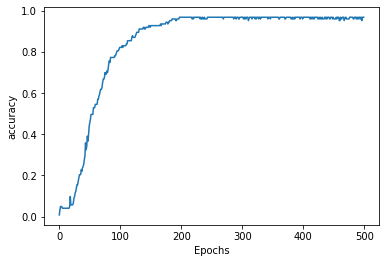

In [69]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

With the model trained, you can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. See how it is implemented in the code below:

In [70]:
def predict_words(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences(seed_text)[0]

    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    probabilities = model.predict(token_list)
    predicted = np.argmax(probabilities,  axis=-1)[0]

    if predicted != 0:
      output_word = tokenizer.index_word[predicted]
      seed_text += ' ' + output_word
  return seed_text

In [72]:
seed_text= "Telanjang"
predict_words(seed_text, 100)

'Telanjang agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar agar'

Overfit karena data yang dimasukkan kecil, dan banyak kata stopwords terdapat di dalam data